In [1]:
import sys
sys.path.insert(0, '../../../network')
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule, set_connectivity 
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

### Initialization

In [2]:
params = np.load("./ctx_str_params.npz", allow_pickle=True) 
N, sequences, patterns, cp, cw, A = params['N'], params['sequences'], params['patterns'], params['cp'], params['cw'], params['A']

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8)

# populations
ctx = Population(N=N[0], tau=1e-2, phi=phi, name='ctx')
d1 = Population(N=N[1], tau=1e-2, phi=phi, name='d1')
# d2 = Population(N=N[2], tau=1e-2, phi=phi, name='d2')

J = set_connectivity([ctx, d1], cp, cw, A, patterns, plasticity)
network = RateNetwork([ctx, d1], J, formulation=4, disable_pbar=False)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Building connections from ctx to d1
INFO:connectivity:Building connections from d1 to ctx
INFO:connectivity:Building connections from d1 to d1


### Simulation

In [4]:
init_inputs = [np.zeros(ctx.size),
               np.zeros(d1.size)]
input_patterns = [p[0] for p in patterns]

T=10 #ms
mouse = ReachingTask()
network.simulate_learning(mouse, T, init_inputs, input_patterns, plasticity, 
                          delta_t=800, eta=0.008, tau_e=2500, lamb=0.5, 
                          noise=[0.13,0.13,0.13], a_cf=0, e_bl = [0.05,0.03,0.045,0.07], etrace=False, 
                          hyper=False, r_ext=[lambda t:0, lambda t: .5], print_output=False)

INFO:network:Integrating network dynamics
  2%|▏         | 172/9999 [00:04<01:43, 95.09it/s]

null scavenge


  5%|▌         | 542/9999 [00:08<01:37, 96.68it/s]

scavenge aim


  8%|▊         | 772/9999 [00:10<01:35, 96.62it/s]

aim lick


 11%|█         | 1062/9999 [00:13<01:31, 97.21it/s]

lick scavenge


 21%|██        | 2102/9999 [00:24<01:21, 96.99it/s]

scavenge aim


 23%|██▎       | 2282/9999 [00:26<01:20, 95.83it/s]

aim reach


 25%|██▌       | 2502/9999 [00:28<01:17, 96.71it/s]

reach lick


 28%|██▊       | 2782/9999 [00:31<01:13, 98.05it/s]

lick scavenge


 36%|███▋      | 3633/9999 [00:39<01:06, 96.19it/s]

scavenge aim


 38%|███▊      | 3843/9999 [00:42<01:03, 97.39it/s]

aim lick


 42%|████▏     | 4153/9999 [00:45<01:01, 95.47it/s]

lick scavenge


 46%|████▌     | 4603/9999 [00:49<00:56, 95.46it/s]

scavenge aim


 48%|████▊     | 4823/9999 [00:52<00:53, 95.93it/s]

aim reach


 49%|████▊     | 4873/9999 [00:52<00:52, 96.98it/s]

reach lick


 52%|█████▏    | 5153/9999 [00:55<00:50, 96.32it/s]

lick scavenge


 59%|█████▊    | 5863/9999 [01:03<00:43, 95.35it/s]

scavenge aim


 61%|██████    | 6069/9999 [01:05<00:41, 93.84it/s]

aim lick


 64%|██████▎   | 6369/9999 [01:08<00:37, 96.22it/s]

lick scavenge


 70%|██████▉   | 6988/9999 [01:15<00:32, 94.03it/s]

scavenge aim


 72%|███████▏  | 7188/9999 [01:17<00:29, 95.96it/s]

aim lick


 75%|███████▍  | 7498/9999 [01:20<00:26, 95.69it/s]

lick scavenge


 91%|█████████ | 9088/9999 [01:37<00:09, 95.21it/s]

scavenge aim


 93%|█████████▎| 9298/9999 [01:39<00:07, 95.49it/s]

aim reach


 95%|█████████▌| 9508/9999 [01:41<00:05, 96.18it/s]

reach lick


 98%|█████████▊| 9808/9999 [01:44<00:01, 96.05it/s]

lick scavenge


100%|██████████| 9999/9999 [01:46<00:00, 93.69it/s]


### Results

In [5]:
overlaps_ctx = sequences[0][0].overlaps(network.pops[0])
overlaps_d1 = sequences[1][0].overlaps(network.pops[1])
# overlaps_d2 = sequences[2][0].overlaps(network.pops[2])
# filename = 'learning-0005-1600-600-5-1000-v0'
# np.savez('./data/' + filename + '.npz', 
#          overlaps_ctx=overlaps_ctx, overlaps_bg=overlaps_bg, 
#          correlations_ctx=correlations_ctx, correlations_bg=correlations_bg, 
#          state_ctx=net_ctx.exc.state, state_bg=net_bg.exc.state)

INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 88.72it/s]
INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 89.42it/s]


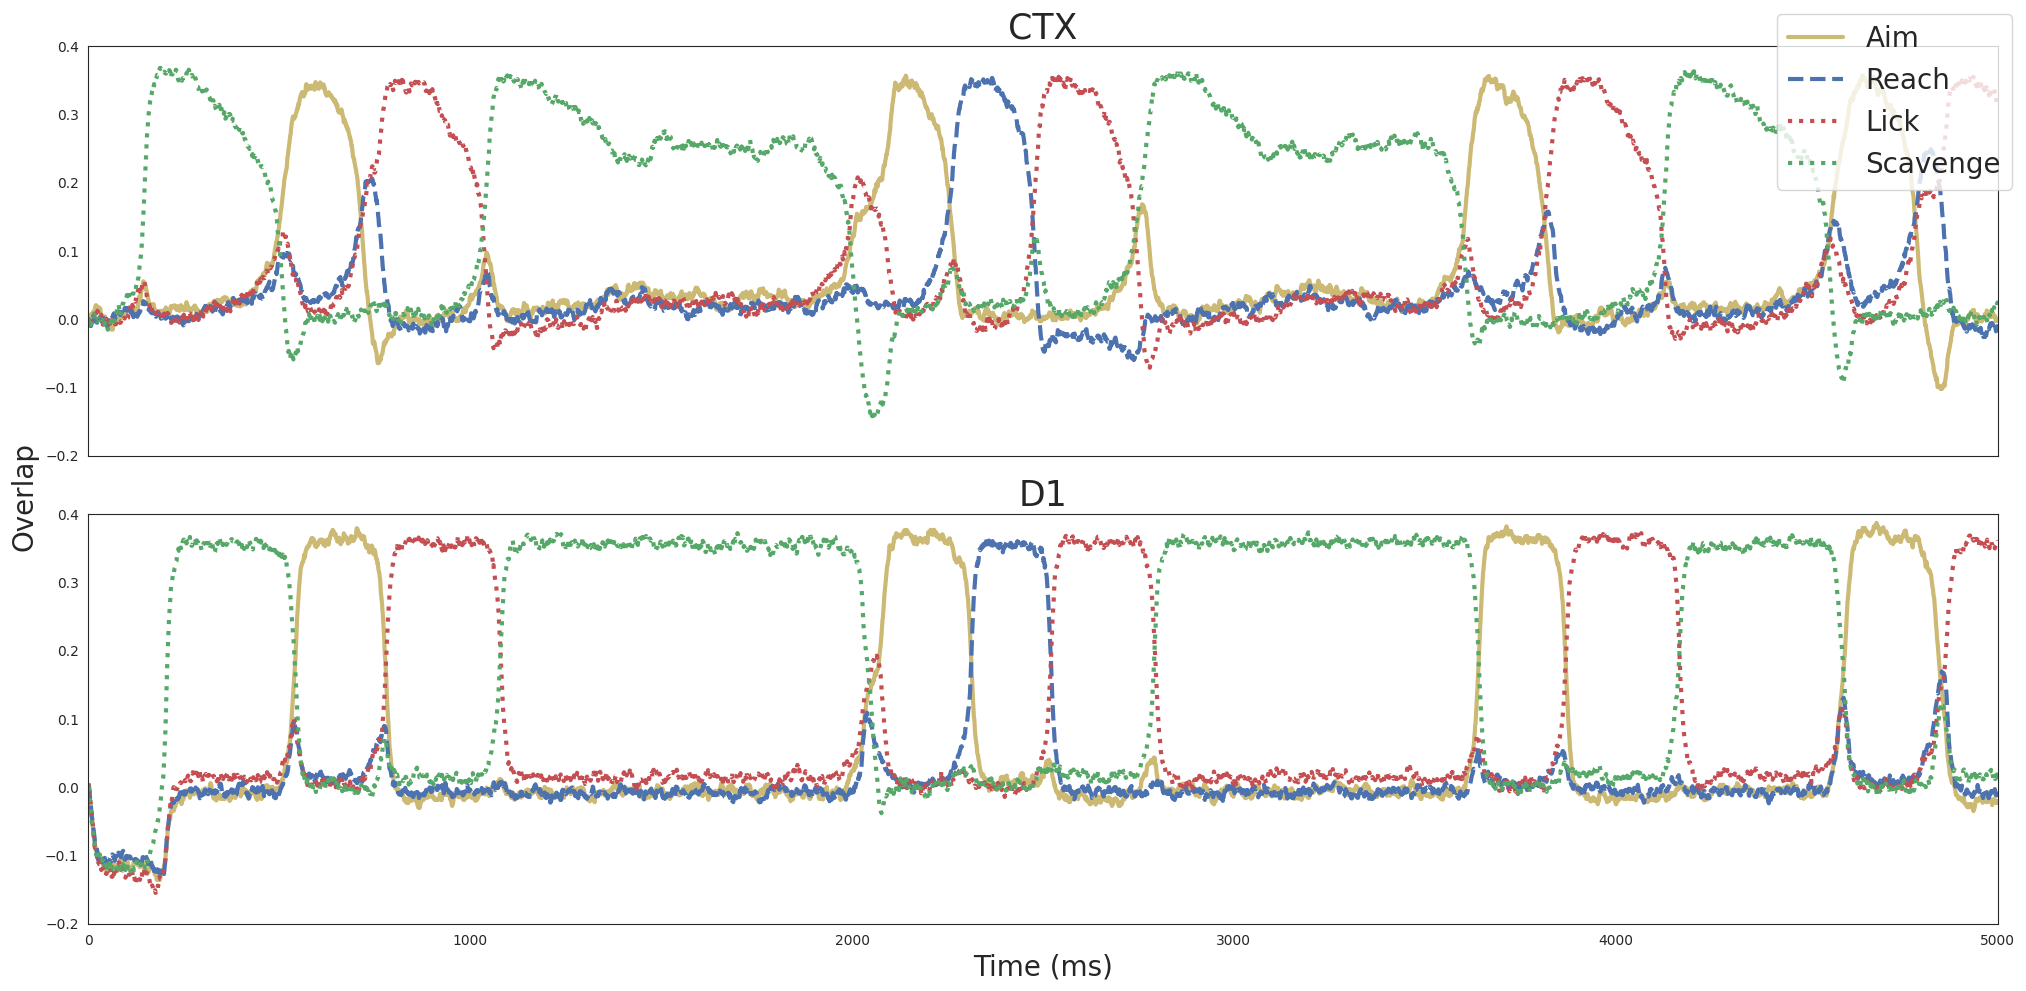

In [6]:
sns.set_style('white') 
colors = sns.color_palette('deep')

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, tight_layout=True, figsize=(20,10))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=3, color=colors[8], label='Aim')
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=3, color=colors[0], label='Reach')
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=3, color=colors[3], label='Lick')
axes[0].plot(overlaps_ctx[3], linestyle='dotted', linewidth=3, color=colors[2], label='Scavenge')
# axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
# axes.set_xlabel('Time (ms)', fontsize=20)
axes[1].plot(overlaps_d1[0], linestyle='solid', linewidth=3, color=colors[8])
axes[1].plot(overlaps_d1[1], linestyle='dashed', linewidth=3, color=colors[0])
axes[1].plot(overlaps_d1[2], linestyle='dotted', linewidth=3, color=colors[3])
axes[1].plot(overlaps_d1[3], linestyle='dotted', linewidth=3, color=colors[2])
# axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("D1", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
axes[1].set_xlabel('Time (ms)', fontsize=20)

fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 5000))
plt.setp(axes, ylim=(-.2, .4))
plt.figlegend(fontsize=20, loc='upper right')
# plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
# plt.savefig('/work/jp464/striatum-sequence/output/simulation-pre-learning-dynamic-env.jpg', bbox_inches = "tight", format='jpg')

plt.show()


In [7]:
def temporal_diff(A, B, max_iter):
    sum = 0
    cnt = 0
    for i in range(len(A)):
        if i == 0: continue
        if B[i+1] == None:
            break
        diff = B[i+1][1] - A[i][1]
        sum += (diff)
        cnt += 1
    return sum / cnt

temporal_diff(mouse.behaviors[0], mouse.behaviors[1], 100)

654.7826086956521

In [8]:
print(mouse.behaviors[0][0:10])
print(mouse.behaviors[1][0:10])

[list([-1, 0]) list([3, 151]) list([0, 521]) list([2, 756])
 list([3, 1048]) list([0, 2087]) list([1, 2266]) list([2, 2485])
 list([3, 2767]) list([0, 3618])]
[list([-1, 1]) list([3, 210]) list([0, 546]) list([2, 784])
 list([3, 1082]) list([0, 2078]) list([1, 2315]) list([2, 2525])
 list([3, 2795]) list([0, 3645])]
